# Changes

We can see, cross-entropy of testing data tensed to increase as we give more example from previous code, so data must be overfitting, we're using "dropout" to resolve this problem and increase accuracy

DropOut :

When using RELUs, make sure biases are initialised with small *positive* values for example 0.1 = tf.ones([K])/10
* Using Relu as activation function
* initialize Bias as non-zero
* Weights initialised with small random values between -0.2 and +0.2



In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [2]:
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])

In [3]:
L = 200; M = 100; N=60; O=30

W1 = tf.Variable( tf.truncated_normal( [784,L],stddev=0.1 ) )
W2 = tf.Variable( tf.truncated_normal( [L,M],stddev=0.1 ) )
W3 = tf.Variable( tf.truncated_normal( [M,N],stddev=0.1 ) )
W4 = tf.Variable( tf.truncated_normal( [N,O],stddev=0.1 ) )
W5 = tf.Variable( tf.truncated_normal( [O,10],stddev=0.1 ) )

B1 = tf.Variable(tf.ones([L])/10)
B2 = tf.Variable(tf.ones([M])/10)
B3 = tf.Variable(tf.ones([N])/10)
B4 = tf.Variable(tf.ones([O])/10)
B5 = tf.Variable(tf.ones([10])/10)

In [4]:
pkeep = tf.placeholder(tf.float32)
Y1 = tf.nn.relu(tf.matmul(x,W1)+B1)
Y1d = tf.nn.dropout(Y1,pkeep)

Y2 = tf.nn.relu(tf.matmul(Y1d,W2)+B2)
Y2d = tf.nn.dropout(Y2,pkeep)

Y3 = tf.nn.relu(tf.matmul(Y2d,W3)+B3)
Y3d = tf.nn.dropout(Y3,pkeep)

Y4 = tf.nn.relu(tf.matmul(Y3d,W4)+B4)
Y4d = tf.nn.dropout(Y4,pkeep)

logits = tf.matmul(Y4d,W5)+B5
y_pred = tf.nn.softmax(logits)

In [5]:
cross_entropy = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=logits,
                                                        labels=y) )
#optimizer = tf.train.GradientDescentOptimizer(0.05)
optimizer = tf.train.AdamOptimizer()
train_step = optimizer.minimize(cross_entropy) 

# 1# For Beginner 
We find the accuracy for testing data

# 1#A. We backpropagate for 10 times

In [ ]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
correct_pred = tf.equal(tf.argmax(y_pred,1),tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))


for _ in range(10000):
    batch_xs, batch_ys = data.train.next_batch(100)
    training_data = {x: batch_xs, y: batch_ys}
    for _ in range(10):    
        sess.run(train_step, feed_dict=training_data)

print(sess.run(accuracy,feed_dict={x:data.test.images,y:data.test.labels}))

# 1#B. We backpropagate once

In [9]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
correct_pred = tf.equal(tf.argmax(y_pred,1),tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))


for _ in range(10000):
    batch_xs, batch_ys = data.train.next_batch(100)
    training_data = {x: batch_xs, y: batch_ys, pkeep: 0.75}       
    sess.run(train_step, feed_dict=training_data)

print(sess.run(accuracy,feed_dict={x:data.test.images,y:data.test.labels,pkeep:1.0}))

0.9766


# 2# Better visualization 
Here we can see the improvement of accuray and cross_entropy as we train more data 

In [6]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
correct_pred = tf.equal(tf.argmax(y,1),tf.argmax(y_pred,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))

# train data
training_acc = []
training_ce = []
test_acc = []
test_ce = []
import numpy as np
for i in range(10000):
    batch_xs, batch_ys = data.train.next_batch(100)
    training_data = {x: batch_xs, y: batch_ys,pkeep:0.75}
    sess.run(train_step, feed_dict=training_data)

    if  np.remainder([i], 100) == 0:
        acc,ce = sess.run([accuracy,cross_entropy], feed_dict=training_data)
        training_acc.append(acc)
        training_ce.append(ce)
        
        test_data = {x:data.test.images,y:data.test.labels,pkeep:1}
        acc2,ce2 = sess.run([accuracy,cross_entropy],feed_dict=test_data)
        test_acc.append(acc2)
        test_ce.append(ce2)
    
    


In [7]:
test_data = {x:data.test.images,y:data.test.labels,pkeep:1}
test_accuracy,test_crossentropy = sess.run([accuracy,cross_entropy],feed_dict=test_data)
print('Testing Accuracy:\t',test_accuracy)
print('Testing Cross Entropy:\t',test_crossentropy)

Testing Accuracy:	 0.9766
Testing Cross Entropy:	 0.0925347


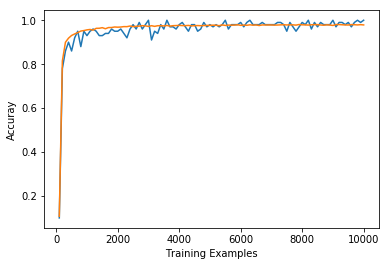

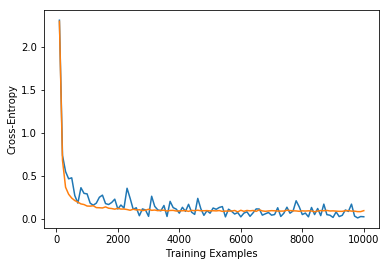

In [8]:
import matplotlib.pyplot as plt
l = np.arange (100,10001,100)
plt.plot(l,training_acc)
plt.plot(l,test_acc)
plt.xlabel('Training Examples')
plt.ylabel('Accuray')
plt.show()

plt.plot(l,training_ce)
plt.plot(l,test_ce)
plt.xlabel('Training Examples')
plt.ylabel('Cross-Entropy')
plt.show()

